This file contains code to quantify differences in song structure and sequence based on sequence linearity, consistency and stereotypy [Sakata and Brainard 2006] and transition entropy [Scharff and Nottebohm 1991].

Date: 13/10/22

In [1]:
import math
import pandas
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#set directory
os.chdir('D:\\4th Year\\Semester 7\\BI4313 Sem Project\\IN-comparative-analysis\\IN-comparative-analysis\\Trans_prob')

file = pandas.read_csv('ZF_org11pnk5_50files_transition_probability_2.csv', header=None)
df = file.to_numpy()

#Drop the row and column labels, just keep the numeric values
trans_prob = file.iloc[1:, 1:]
trans_prob = np.array(trans_prob)
trans_prob = trans_prob.astype(float)

#Get the set of unique syllables for the individual with their own index (so convert array to list)
uniq_syl = file.iloc[0].to_numpy()
uniq_syl = np.delete(uniq_syl, 0)

Sequence Linearity

Number of unique syllables/Number of unique transitions

In [3]:
#SEQUENCE LINEARITY
#Number of unique syllables
n_syl = len(uniq_syl)

#To get the number of unique transitions, create an array with 1 whenever trans_prob > 0
#and get the sum of the array
trans_num = np.zeros_like(trans_prob)
trans_num[trans_prob > 0] = 1
n_trans = sum(map(sum, trans_num))

s_lin = n_syl/n_trans

print(f'Number of syllables: {n_syl}')
print(f'Number of transitions: {n_trans}')
print(f'Sequence linearity: {s_lin}')


Number of syllables: 10
Number of transitions: 25.0
Sequence linearity: 0.4


Sequence Consistency

Sum of typical transitions/Sum of all transitions

In [4]:
#SEQUENCE CONSISTENCY
#"The typical transition type for each note is operationally defined as the one most frequently encountered 
#(for introductory notes, the two most frequently encountered)."

#numerator - sum of typical transitions
typ_trans = np.max(trans_prob, axis = 1)
typ_sum = sum(typ_trans)

#denominator - sum of all transitions
trans_sum = sum(map(sum, trans_prob))

s_con = typ_sum/trans_sum

print(f'Sum of typical transitions: {typ_sum}')
print(f'Sum of all transitions: {trans_sum}')
print(f'Sequence consistency: {s_con}')

Sum of typical transitions: 5.32
Sum of all transitions: 8.73
Sequence consistency: 0.6093928980526919


Sequence Stereotypy

In [5]:
#SEQUENCE STEREOTYPY

s_stereo = (s_lin + s_con)/2

print(f'Sequence stereotypy: {s_stereo}')

Sequence stereotypy: 0.5046964490263459


Transition entropy

sum (-p * log2[p])

In [6]:
#TRANSITION ENTROPY
from math import nan

trans_entropy = trans_prob

for i in range(len(trans_entropy)):
    for j in range(len(trans_entropy)):
        trans_entropy[i, j] = -trans_entropy[i, j] * np.log2(trans_entropy[i, j])

trans_entropy[np.isnan(trans_entropy)] = 0
transition_entropy = sum(map(sum, trans_entropy))

transition_entropy

C:\Users\VASUDH~1\AppData\Local\Temp/ipykernel_20940/3832714603.py:8: RuntimeWarning: divide by zero encountered in log2
  trans_entropy[i, j] = -trans_entropy[i, j] * np.log2(trans_entropy[i, j])
C:\Users\VASUDH~1\AppData\Local\Temp/ipykernel_20940/3832714603.py:8: RuntimeWarning: invalid value encountered in double_scalars
  trans_entropy[i, j] = -trans_entropy[i, j] * np.log2(trans_entropy[i, j])


10.463054824843056

In [466]:
#Test matrix
#trans_prob = np.array([[1, 0, 0], [0, 0.5, 0], [0, 0, 0.25]])

C:\Users\VASUDH~1\AppData\Local\Temp/ipykernel_2044/3828241856.py:4: RuntimeWarning: divide by zero encountered in log2
  z = -x[i] * np.log2(x[i])
C:\Users\VASUDH~1\AppData\Local\Temp/ipykernel_2044/3828241856.py:4: RuntimeWarning: invalid value encountered in double_scalars
  z = -x[i] * np.log2(x[i])


nan


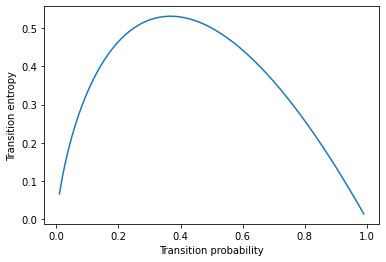

In [2]:

x = np.arange(0, 1, 0.01)
y = []
for i in range(0, len(x)):
    z = -x[i] * np.log2(x[i])
    y.append(z)

print(max(y))

plt.xlabel('Transition probability')
plt.ylabel('Transition entropy')
plt.plot(x, y)
plt.savefig('Transition entropy.png')

To calculate differences in syllable types, and initial syllables, intersyllable interval, amplitude and so on. For that, we need to to go back to Onset-Offset data and chunk the song bouts using 'Start' and 'End'

Number of starting syllables - value and fraction

In [7]:
#To get the number of transitions from 'Start'

syl_list = uniq_syl.tolist()
s = syl_list.index('Start') #get the idex of 'Start' row

#sum over Number of transitions matrix 'Start' row using the index
n_start = np.sum(trans_num[s])

print(f'Number of unique start syllables: {n_start}')
print(f'Fraction of unique start syllables: {n_start/n_syl}')

Number of unique start syllables: 2.0
Fraction of unique start syllables: 0.2


In [81]:
#Get the indices at which 'End' exists to extract song bouts
#Import onset-offset data with 'Start-End' rows
os.chdir('D:\\4th Year\\Semester 7\\BI4313 Sem Project\\IN-comparative-analysis\\IN-comparative-analysis\\OnsetOffsetFiles')

data = pandas.read_csv('ZF_org11pnk5_50files_start_end_2.csv', header=None,
        names = ['FileName', 'Syll #', 'Syll Label',
       ' Syll Onset (ms)', ' Syll Offset (ms)', ' Syll Duration (sec)', ' Mean Frequency (Hz)',
       ' Entropy', 'Log Amplitude (dB)', 'Pitch Goodness', 'FrequencyModulation',
       'AmplitudeModulation', 'EntropyVariance', 'Fundamental Frequency (Hz)', 'RMS Amplitude'])

syl = data['Syll Label']
all_syl = syl.tolist()

def find_end_indices(list, element):
    indices = [0]
    for idx, value in enumerate(list):
        if value == element:
            indices.append(idx)
    return indices

end_indices = find_end_indices(all_syl, 'End')
#print(end_indices)

song_bouts = []
for i in range(len(end_indices)-1):
    x = data.iloc[end_indices[i] + 2 : end_indices[i+1], :9]
    song_bouts.append(x)

print(len(song_bouts))

57


Next, we're going to calculate the inter-note interval, amplitude and frequency of notes along the song motif. For this, we're only going to work with song which have more syllables than half the average number.

In [82]:
#Define a function to pick song bouts that are long in length

def motif_finder(bouts_list):
    motif = bouts_list.copy()
    syll_num = []
    short_song_idx = []
    for i in range(len(bouts_list)):
        bout = bouts_list[i]
        syllable_list = bout['Syll Label'].tolist()
        syll_num.append(len(syllable_list))
    avg_syl_num = np.mean(syll_num)
    for i in range(len(syll_num)):
        if syll_num[i] < avg_syl_num/3:
            short_song_idx.append(i)
    for i in range(len(short_song_idx)):
        short_song_idx[i] -= i
    for j in short_song_idx:
        del motif[j]
    return motif
    

song_motif = motif_finder(song_bouts)
#print(song_motif)

[                      FileName  Syll # Syll Label   Syll Onset (ms)  \
2   org11pnk5_020815123408.wav       2          i           1562.27   
3   org11pnk5_020815123408.wav       3          t           1666.24   
4   org11pnk5_020815123408.wav       4          i           1738.44   
5   org11pnk5_020815123408.wav       5          a           1846.58   
6   org11pnk5_020815123408.wav       6          b           2008.96   
7   org11pnk5_020815123408.wav       7          c           2232.43   
8   org11pnk5_020815123408.wav       8          a           2450.02   
9   org11pnk5_020815123408.wav       9          b           2618.19   
10  org11pnk5_020815123408.wav      10          c           2842.45   
11  org11pnk5_020815123408.wav      11          p           3235.10   
12  org11pnk5_020815123408.wav      12          s           3341.02   
13  org11pnk5_020815123408.wav      13          k           3487.60   
14  org11pnk5_020815123408.wav      14          p           3698.14   
15  o

In [41]:
#To check how song data is being stored in the list, you can print it out in a text file or check the length 
#of the list. Here, each element in the list is a Pandas dataframe

#Except for the first song bout, every other song bout starts with a 'Start' row 
#To avoid this, first syllable of first song can be lost, which seems fairer

# with open(r'D:\\4th Year\\Semester 7\\BI4313 Sem Project\\IN-comparative-analysis\\IN-comparative-analysis\\OnsetOffsetFiles\\ZF_org11pnk5_test_songbouts.txt', 'w') as fp:
#     for item in song_bouts:
#         fp.write("%s\n" % item)

# print(f'Number of song bouts is roughly about: {len(song_bouts)}')


1. Do the first syllables repeat in each song bout? 
2. Average number of syllables in each song bout

!! Make sure avg_syl/3 > 10 !!

In [85]:
#To calculate if the first syllable repeats, and if yes, how many times?
#Also get the number of syllables in each song

repeat_y_n = []
syll_num = []

for i in range(len(song_motif)):
    bout = song_motif[i]
    syllable_list = bout['Syll Label'].tolist()
    syll_num.append(len(syllable_list))
    if len(syllable_list) > 3:
        if syllable_list[0] == syllable_list[1]:
            repeat_y_n.append(1)
        else:
            repeat_y_n.append(0)

print(sum(repeat_y_n), repeat_y_n, syll_num, len(syll_num))
print(f'Average number of syllables in a song bout: {np.mean(syll_num)}')
#print(f'Fraction of times the first syllable is repeated: {sum(repeat_y_n)/len(repeat_y_n)}')


34 [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] [19, 32, 39, 29, 27, 28, 36, 27, 17, 36, 20, 42, 25, 69, 19, 25, 22, 29, 22, 15, 27, 13, 32, 35, 47, 39, 17, 12, 51, 26, 18, 18, 88, 22, 22, 30, 23, 28, 32, 21, 42] 41
Average number of syllables in a song bout: 29.78048780487805


3. Number of times the first syllable in a song bout repeats

In [57]:
#To count the number of repeated syllables in the beginning
repeat_num = []

for i in range(len(song_motif)):
    bout = song_motif[i]
    syllable_list = bout['Syll Label'].tolist()
    for t in range(1, len(syllable_list)):
        if syllable_list[t] != syllable_list[0]:
            first_syllable_repeats = t
            break
    repeat_num.append(first_syllable_repeats)

print(repeat_num, len(repeat_num))
print(f'Average number of repeats of first syllable is: {np.mean(repeat_num)}')
#print(len(repeat_num))

[1, 4, 3, 3, 2, 2, 2, 2, 3, 4, 2, 3, 2, 2, 6, 1, 3, 1, 2, 4, 3, 2, 2, 3, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 4, 4, 1, 2, 1, 2, 3, 1, 2, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 6, 6, 3, 3] 57
Average number of repeats of first syllable is: 2.526315789473684


Instead of counting the number of repeats in each song bout, we can also get the weighted average of self-transition probability of the starting syllables

In [58]:
#To find the average self-transition probability of the first syllables after start
syl_list = uniq_syl.tolist()
s = syl_list.index('Start')

def find_indices(list, element):
    indices = []
    for idx, value in enumerate(list):
        if value == element:
            indices.append(idx)
    return indices

first_syl = trans_num[s].tolist()
first_syl_idx = find_indices(first_syl, 1)

first_syl_trans = []
for i in first_syl_idx:
    first_syl_trans.append(trans_prob[i,i] * trans_prob[s,i])

print(first_syl_trans)
print(np.mean(first_syl_trans))

[0.20362979997122446, 0.0]
0.10181489998561223


In [19]:
print(f'Number of syllables: {n_syl}')

print(f'Number of transitions: {n_trans}')

print(f'Number of unique start syllables: {n_start}')

print(f'Average number of repeats of first syllable is: {np.mean(repeat_num)}')

print(np.mean(first_syl_trans))

print(f'Average number of syllables in a song bout: {np.mean(syll_num)}')

print(f'Sequence linearity: {s_lin}')

print(f'Sequence consistency: {s_con}')

print(f'Sequence stereotypy: {s_stereo}')

transition_entropy

Number of syllables: 10
Number of transitions: 25.0
Number of unique start syllables: 2.0
Average number of repeats of first syllable is: 2.526315789473684
0.10181489998561223
Average number of syllables in a song bout: 20.87719298245614
Sequence linearity: 0.4
Sequence consistency: 0.6093928980526919
Sequence stereotypy: 0.5046964490263459


10.463054824843056

Syllable duration, amplitude, inter-note interval, song duration of various bird species

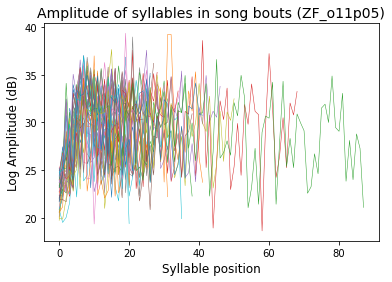

In [113]:
#To plot the log amplitude of syllables 

for i in range(len(song_motif)):
    bout = song_motif[i]
    amplitude = bout['Log Amplitude (dB)']
    amplitude = amplitude.tolist()
    x = np.arange(len(bout))
    plt.plot(x, amplitude, linewidth = 0.5)


plt.xlabel('Syllable position', fontsize = 12)
plt.ylabel('Log Amplitude (dB)', fontsize = 12)
plt.title('Amplitude of syllables in song bouts (ZF_o11p05)', fontsize = 14)

plt.get_cmap('viridis')
#plt.show()
plt.savefig('01 amplitude all syllables.png', dpi = 600)

In [149]:
#To try and calculate the average amplitude at each syllable index
amp = []
for i in range(len(song_motif)):
    a = song_motif[i]['Log Amplitude (dB)']
    a = a.tolist()[1:11]
    amp.append(a)

amp_10syl = np.array([np.array(i) for i in amp])


def mean_value(data):
    avg = []
    for i in range(len(data[0])):
        temp = []
        for j in range(len(data)):
            t = data[j, i]
            temp.append(t)
        avg.append(np.mean(temp))
    return avg


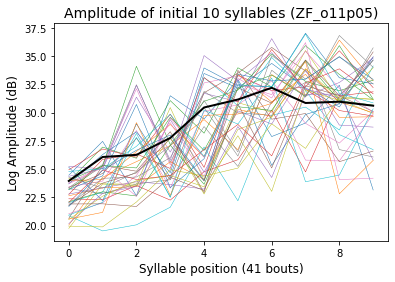

In [151]:
#To plot the log amplitude of syllables 

for i in range(len(song_motif)):
    bout = song_motif[i]
    amplitude = bout['Log Amplitude (dB)']
    amplitude = amplitude.tolist()
    amplitude = amplitude[:10]
    x = np.arange(10)
    plt.plot(x, amplitude, linewidth = 0.5)

#plot the average values of first 10 syllables
xaxis = np.arange(10)
plt.plot(xaxis, mean_value(amp_10syl), 'k', linewidth = 2)

plt.xlabel('Syllable position (41 bouts)', fontsize = 12)
plt.ylabel('Log Amplitude (dB)', fontsize = 12)
plt.title('Amplitude of initial 10 syllables (ZF_o11p05)', fontsize = 14)

plt.get_cmap('viridis')
#plt.show()
plt.savefig('02 amplitude 10 syll ZFo11p5.png', dpi = 600)

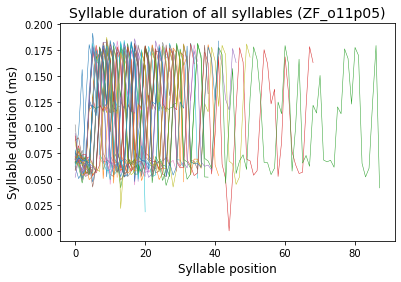

In [134]:
#Syllable durations

for i in range(len(song_motif)):
    bout = song_motif[i]
    dur = bout[' Syll Duration (sec)']
    dur = dur.tolist()
    x = np.arange(len(bout))
    plt.plot(x, dur, linewidth = 0.5)


plt.xlabel('Syllable position', fontsize = 12)
plt.ylabel('Syllable duration (ms)', fontsize = 12)
plt.title('Syllable duration of all syllables (ZF_o11p05)', fontsize = 14)

plt.get_cmap('viridis')
#plt.show()
plt.savefig('03 duration all syllables ZFo11p05.png', dpi = 600)

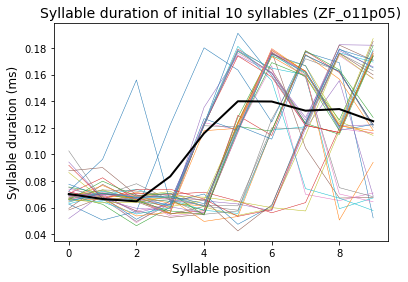

In [198]:
#Syllable durations
duration = []
for i in range(len(song_motif)):
    d = song_motif[i][' Syll Duration (sec)']
    d = d.tolist()[1:11]
    duration.append(d)

dur_10syl = np.array([np.array(i) for i in duration])

for i in range(len(song_motif)):
    bout = song_motif[i]
    dur = bout[' Syll Duration (sec)']
    dur = dur.tolist()
    dur = dur[:10]
    x = np.arange(10)
    plt.plot(x, dur, linewidth = 0.5)

#plot the average values of first 10 syllables
xaxis = np.arange(10)
plt.plot(xaxis, mean_value(dur_10syl), 'k', linewidth = 2)

plt.xlabel('Syllable position', fontsize = 12)
plt.ylabel('Syllable duration (ms)', fontsize = 12)
plt.title('Syllable duration of initial 10 syllables (ZF_o11p05)', fontsize = 14)

plt.get_cmap('viridis')
#plt.show()
plt.savefig('04 duration 10 syllables ZFo11p05.png', dpi = 600)

In [181]:
#Calculating inter-note interval

def intervals(song_list):
    intervals = []
    for i in range(len(song_list)):
        bout = song_list[i]
        in_int = []
        start = np.array(bout[' Syll Onset (ms)'])
        stop = np.array(bout[' Syll Offset (ms)'])
        for j in range(1, len(bout)):
            diff = start[j] - stop[j-1]
            in_int.append(diff)
        intervals.append(in_int)

    return intervals

internote_int = intervals(song_motif)


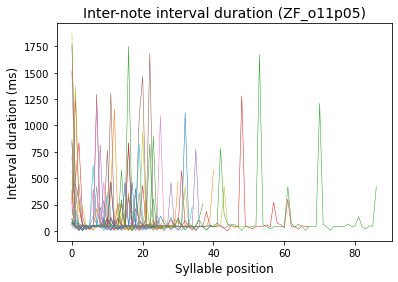

In [187]:
#To plot inter-not intervals

for i in range(len(internote_int)):
    y = internote_int[i]
    x = np.arange(len(y))
    plt.plot(x, y, linewidth = 0.5)

plt.xlabel('Syllable position', fontsize = 12)
plt.ylabel('Interval duration (ms)', fontsize = 12)
plt.title('Inter-note interval duration (ZF_o11p05)', fontsize = 14)

plt.get_cmap('viridis')
#plt.show()
plt.savefig('05 interval all syllables ZFo11p05.png', dpi = 600)

C:\Users\VASUDH~1\AppData\Local\Temp/ipykernel_20940/1563825343.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  int_all_syl = np.array([np.array(i) for i in internote_int])


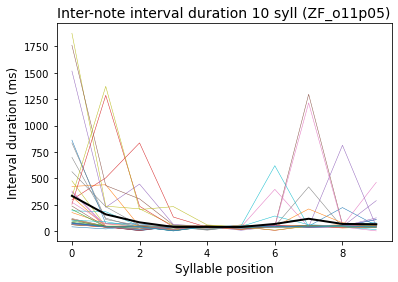

In [197]:
#To plot first 10 internote interval duration

int_all_syl = np.array([np.array(i) for i in internote_int])
int_10syl = []

for i in range(len(int_all_syl)):
    b = int_all_syl[i]
    b = b.tolist()
    ten = b[:10]
    int_10syl.append(ten)

int_10syl = np.array(int_10syl)

for i in range(len(internote_int)):
    y_temp = internote_int[i]
    y = y_temp[:10]
    x = np.arange(len(y))
    plt.plot(x, y, linewidth = 0.5)

xaxis = np.arange(10)
plt.plot(xaxis, mean_value(int_10syl), 'k', linewidth = 2)

plt.xlabel('Syllable position', fontsize = 12)
plt.ylabel('Interval duration (ms)', fontsize = 12)
plt.title('Inter-note interval duration 10 syll (ZF_o11p05)', fontsize = 14)

plt.get_cmap('viridis')
#plt.show()
plt.savefig('06 interval 10 syllables ZFo11p05.png', dpi = 600)

[334.91409756097556,
 159.67031707317074,
 83.70556097560971,
 40.27336585365856,
 40.46170731707318,
 39.78682926829271,
 68.63609756097567,
 117.63829268292676,
 68.72195121951226,
 65.87536585365852]